In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import warnings
import pylab
import pygraphviz
import networkx as nx
import graphviz
warnings.filterwarnings("ignore", category=FutureWarning)

data= pd.read_csv("incidents_datasets_KE.csv")

pd.set_option("display.max_columns",None)
cols = data.columns
num_cols = data._get_numeric_data().columns
cat_cols=list(set(cols) - set(num_cols))
data_cat=data[cat_cols]


data = data.drop(data[data.notified ==0].index)

data_cat['notified']=data['notified']
data_cat["overallseverity"] = data["overallseverity"]
data_cat.drop('dstipcategory_dominate', axis=1, inplace=True)
data_cat.drop('srcipcategory_dominate', axis=1, inplace=True)
data_cat = data_cat[data_cat.overallseverity != 2]
data_cat.loc[:, 'ipcategory_scope'].replace(['Internet', 'Private network'], ['Int', 'Priv'], inplace=True)
# data_cat.loc[:,'ipcategory_scope'].replace('Internet', 'Int')
# data_cat['ipcategory_scope'].replace('Private network', 'Priv')
data_cat=data_cat.dropna()
data_cat.notified = data_cat.notified.astype(int)
data_cat

categoryname grandparent_category             ip  \
98                         Exploit                    A    10.ZQ.RC.62   
134           Control and Maintain                    A    10.AT.DQ.22   
167           Control and Maintain                    A    10.BW.OR.25   
181                         Attack                    A   10.YK.HM.201   
182           Control and Maintain                    A   KZ.DP.224.25   
204           Control and Maintain                    A   10.NF.ZG.109   
230                 Reconnaissance                    A    LW.JQ.8.221   
233                         Attack                    A  BE.KP.162.121   
255                        Exploit                    A   YT.LG.175.66   
305    Suspicious Network Activity                    A    10.XW.BU.91   
331                        Exploit                    A   SO.QW.178.30   
352           Control and Maintain                    A    10.KW.PF.87   
355                         Attack                    A  YA.HF.189.131   
388                         Attack                    A   10.FF.RG.173   
412           Control and Maintain                    A   10.CN.ZT.165   
469           Control and Maintain                    A   10.OA.SZ.104   
513                        Exploit                    A    10.IT.FN.11   
519                         Attack                    A    YT.LB.38.21   
522                 Reconnaissance                    A  YT.LI.171.112   
530    Suspicious Network Activity                    A    10.CN.ZB.40   
548                         Attack                    A    10.KW.GO.98   
555                         Attack                    A  DJ.TU.110.153   
570                         Attack                    A     10.CN.LL.2   
620                         Attack                    A  AQ.CJ.172.162   
644                         Attack                    A   10.YO.KO.189   
656                         Attack                    A   TP.YX.212.46   
667                        Exploit                    A    SR.AG.31.12   
681                         Attack                    A      RZ..202.2   
696           Control and Maintain                    A  SO.JE.235.253   
701    Suspicious Network Activity                    A   AH.ES.111.26   
...                            ...                  ...            ...   
38850                      Exploit                    A    10.KT.ZT.16   
38859                      Exploit                    A   10.CN.MX.204   
38865         Control and Maintain                    A    RW.EK.146.9   
38883  Suspicious Network Activity                    A   JM.DG.74.246   
38941                       Attack                    A   10.FF.HD.183   
38942         Control and Maintain                    A   OQ.OR.76.110   
38966         Control and Maintain                    A  UP.UZ.137.163   
38990                      Exploit                    A   JM.DG.74.246   
39020               Reconnaissance                    A  VX.JI.145.136   
39053  Suspicious Network Activity                    A    10.KW.EU.68   
39055                       Attack                    A  BI.YA.131.241   
39057                      Exploit                    A    10.CQ.GS.42   
39068                      Exploit                    A   EE.YT.58.241   
39117                       Attack                    A   10.XD.OR.226   
39128                      Exploit                    A  172.JF.LL.224   
39137         Control and Maintain                    A  OQ.XJ.130.252   
39166                   Compromise                    A    10.XU.IU.77   
39170         Control and Maintain                    A   10.XU.ZT.105   
39189                       Attack                    A    QP.LB.213.7   
39191                      Exploit                    A     10.AO.BV.1   
39212         Control and Maintain                    A  TH.XM.231.252   
39229         Control and Maintain                    A   10.UX.BQ.208   
39239         Control and 

In [3]:
# data.head(63)
weekdays = list(data_cat[0:500].weekday.unique())
ipcategory_scope= list(data_cat[0:500].ipcategory_scope)
ips = list(data_cat[0:500].ip.unique())
alerts = list(data_cat[0:500].alert_ids.unique())
notify_cat=list(data_cat[0:500].notified.unique())
ip_cat_name=list(data_cat[0:500].categoryname.unique())
overallseverity=list(data_cat[0:500].overallseverity.unique())
overallseverity

[3.0, 4.0, 5.0]

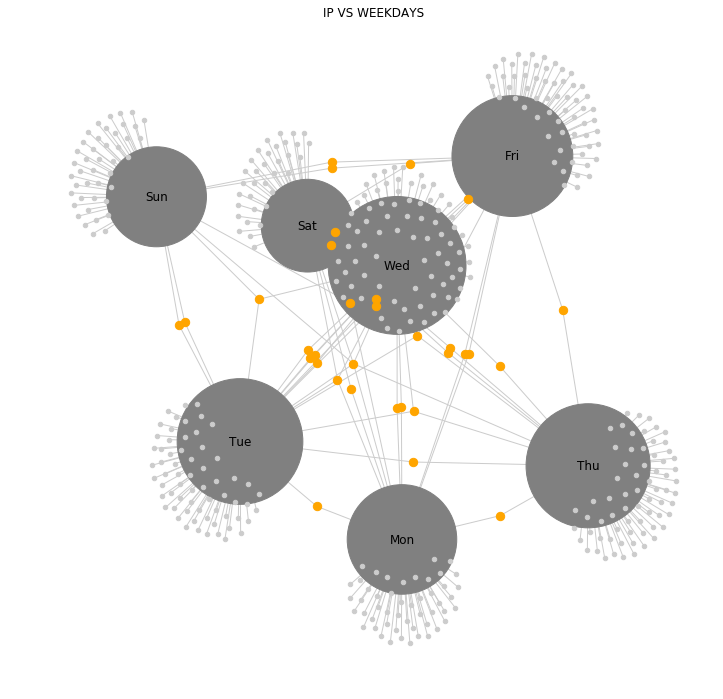

In [4]:
plt.figure(figsize=(12, 12))
g = nx.from_pandas_edgelist(data_cat[0:500], source='ip', target='weekday') 
layout = nx.spring_layout(g,seed=200)
week_size = [g.degree(weekday) * 200 for weekday in weekdays]
nx.draw_networkx_nodes(g, layout, with_labels=True, nodelist=weekdays, node_size=week_size, node_color='gray')
nx.draw_networkx_nodes(g, layout, with_labels=True, nodelist=ips, node_color='#cccccc', node_size=20)
popular_ips = [ip for ip in ips if g.degree(ip) > 1]
nx.draw_networkx_nodes(g, layout, nodelist=popular_ips, node_color='orange', node_size=70)
nx.draw_networkx_edges(g, layout, width=1, edge_color="#cccccc")
node_labels = dict(zip(weekdays, weekdays))
nx.draw_networkx_labels(g, layout, labels=node_labels)
plt.axis('off')
plt.title("IP VS WEEKDAYS")
plt.show()

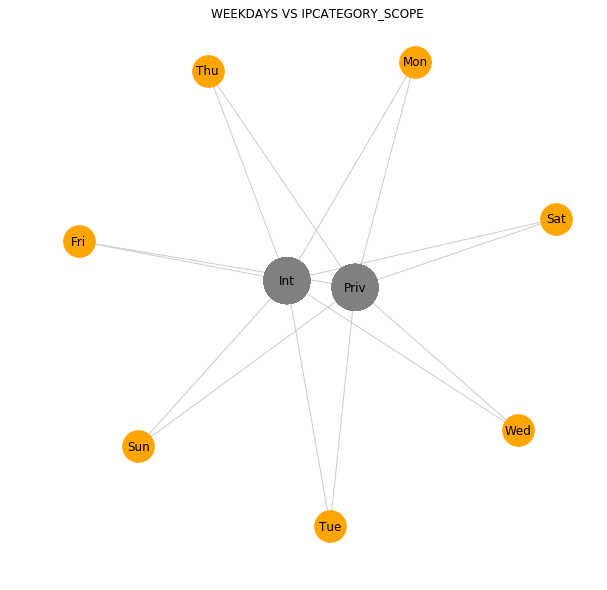

In [5]:
plt.figure(figsize=(10, 10))
g1 = nx.from_pandas_edgelist(data_cat[0:500], source='weekday', target='ipcategory_scope') 
layout = nx.spring_layout(g1,seed=200)
week_size = [g1.degree(weekday) * 300 for weekday in ipcategory_scope]
nx.draw_networkx_nodes(g1, layout, with_labels=True, nodelist=ipcategory_scope, node_size=week_size, node_color='gray')
nx.draw_networkx_nodes(g1, layout, with_labels=True, nodelist=weekdays, node_color='#cccccc', node_size=70)
popular_week = [week for week in weekdays if g1.degree(week) > 0]
nx.draw_networkx_nodes(g1, layout, nodelist=popular_week, node_color='orange', node_size=1000)
nx.draw_networkx_edges(g1, layout, width=1, edge_color="#cccccc")
node_labels = dict(zip(ipcategory_scope, ipcategory_scope))
nx.draw_networkx_labels(g1, layout, labels=node_labels)

node_labels_week = dict(zip(weekdays, weekdays))
nx.draw_networkx_labels(g, layout, labels=node_labels_week)
plt.axis('off')
plt.title("WEEKDAYS VS IPCATEGORY_SCOPE")
plt.show()

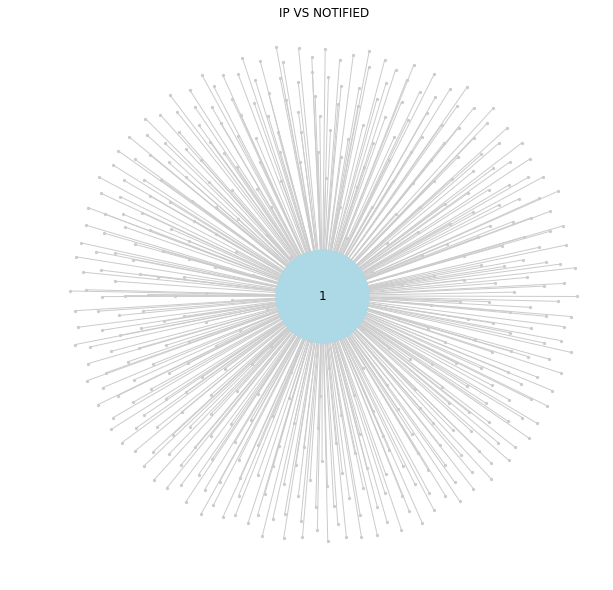

In [6]:
plt.figure(figsize=(10, 10))
g2 = nx.from_pandas_edgelist(data_cat[0:500], source='ip', target='notified') 
layout = nx.spring_layout(g2)
notify_size = [g2.degree(notify) * 20 for notify in notify_cat]
nx.draw_networkx_nodes(g2, layout, with_labels=True, nodelist=notify_cat, node_size=notify_size, node_color='lightblue')
nx.draw_networkx_nodes(g2, layout, nodelist=ips, node_color='#cccccc', node_size=5)
popular_ips = [ip for ip in ips if g2.degree(ip) > 1]
nx.draw_networkx_nodes(g2, layout , nodelist=popular_ips, node_color='orange', node_size=100)
nx.draw_networkx_edges(g2, layout, width=1, edge_color="#cccccc")
node_labels = dict(zip(notify_cat, notify_cat))
nx.draw_networkx_labels(g2, layout, labels=node_labels)
plt.axis('off')
plt.title('IP VS NOTIFIED')
plt.show()

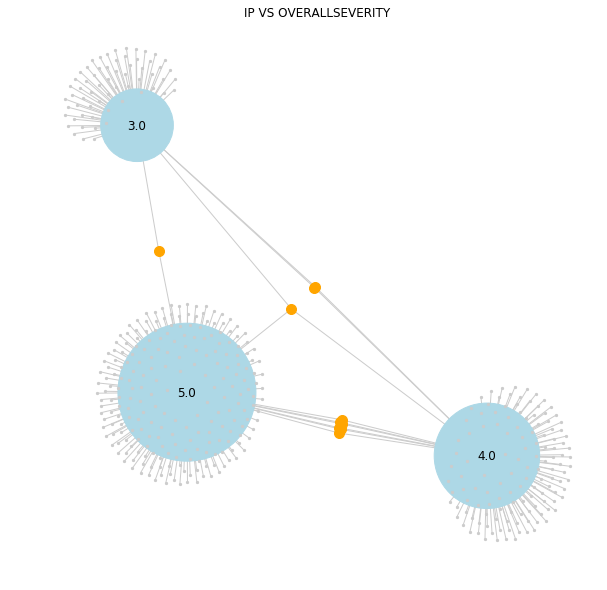

In [7]:
plt.figure(figsize=(10, 10))
g4 = nx.from_pandas_edgelist(data_cat[0:500], source='ip', target='overallseverity') 
layout = nx.spring_layout(g4)
sever_size = [g4.degree(sever) * 80 for sever in overallseverity]
nx.draw_networkx_nodes(g4,layout,with_labels=True, nodelist=overallseverity,  node_size=sever_size, node_color='lightblue')
nx.draw_networkx_nodes(g4, layout, with_labels=True,nodelist=ips, node_color='#cccccc', node_size=5)
popular_ip = [ip for ip in ips if g4.degree(ip) > 1]
nx.draw_networkx_nodes(g4, layout ,with_labels=True, nodelist=popular_ip, node_color='orange', node_size=100)
nx.draw_networkx_edges(g4, layout, with_labels=True,width=1, edge_color="#cccccc")
node_labels = dict(zip(overallseverity,overallseverity))
nx.draw_networkx_labels(g4, layout, labels=node_labels)
plt.axis('off')
plt.title("IP VS OVERALLSEVERITY")
plt.show()

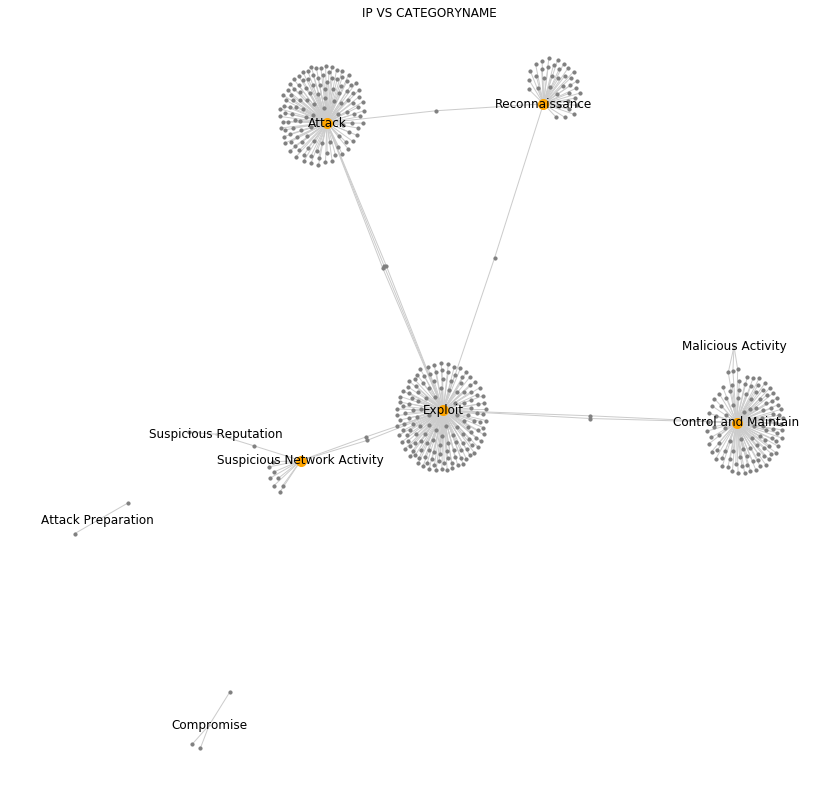

In [8]:
plt.figure(figsize=(14, 14))
g3 = nx.from_pandas_edgelist(data_cat[0:500], source='ip', target='categoryname') 
layout = nx.spring_layout(g3)

nx.draw_networkx_nodes(g3, layout, with_labels=True, nodelist=ips, node_size=10, node_color='gray')
ip_cat_size = [g3.degree(ip) * 10 for ip in ip_cat_name]
nx.draw_networkx_nodes(g3, layout, with_labels=True, nodelist=ip_cat_name, node_color='#cccccc', node_size=2)

popular_ips = [ip for ip in ip_cat_name if g3.degree(ip) > 3]
nx.draw_networkx_nodes(g3, layout, nodelist=popular_ips, node_color='orange', node_size=100)
nx.draw_networkx_edges(g3, layout, width=1, edge_color="#cccccc")
# node_labels = dict(zip(ips, ips))
# nx.draw_networkx_labels(g3, layout, labels=node_labels)

node_labels_scope = dict(zip(ip_cat_name, ip_cat_name))
nx.draw_networkx_labels(g3, layout, labels=node_labels_scope)
plt.axis('off')
plt.title("IP VS CATEGORYNAME")
plt.show()

# of edges: 1811
# of nodes: 454


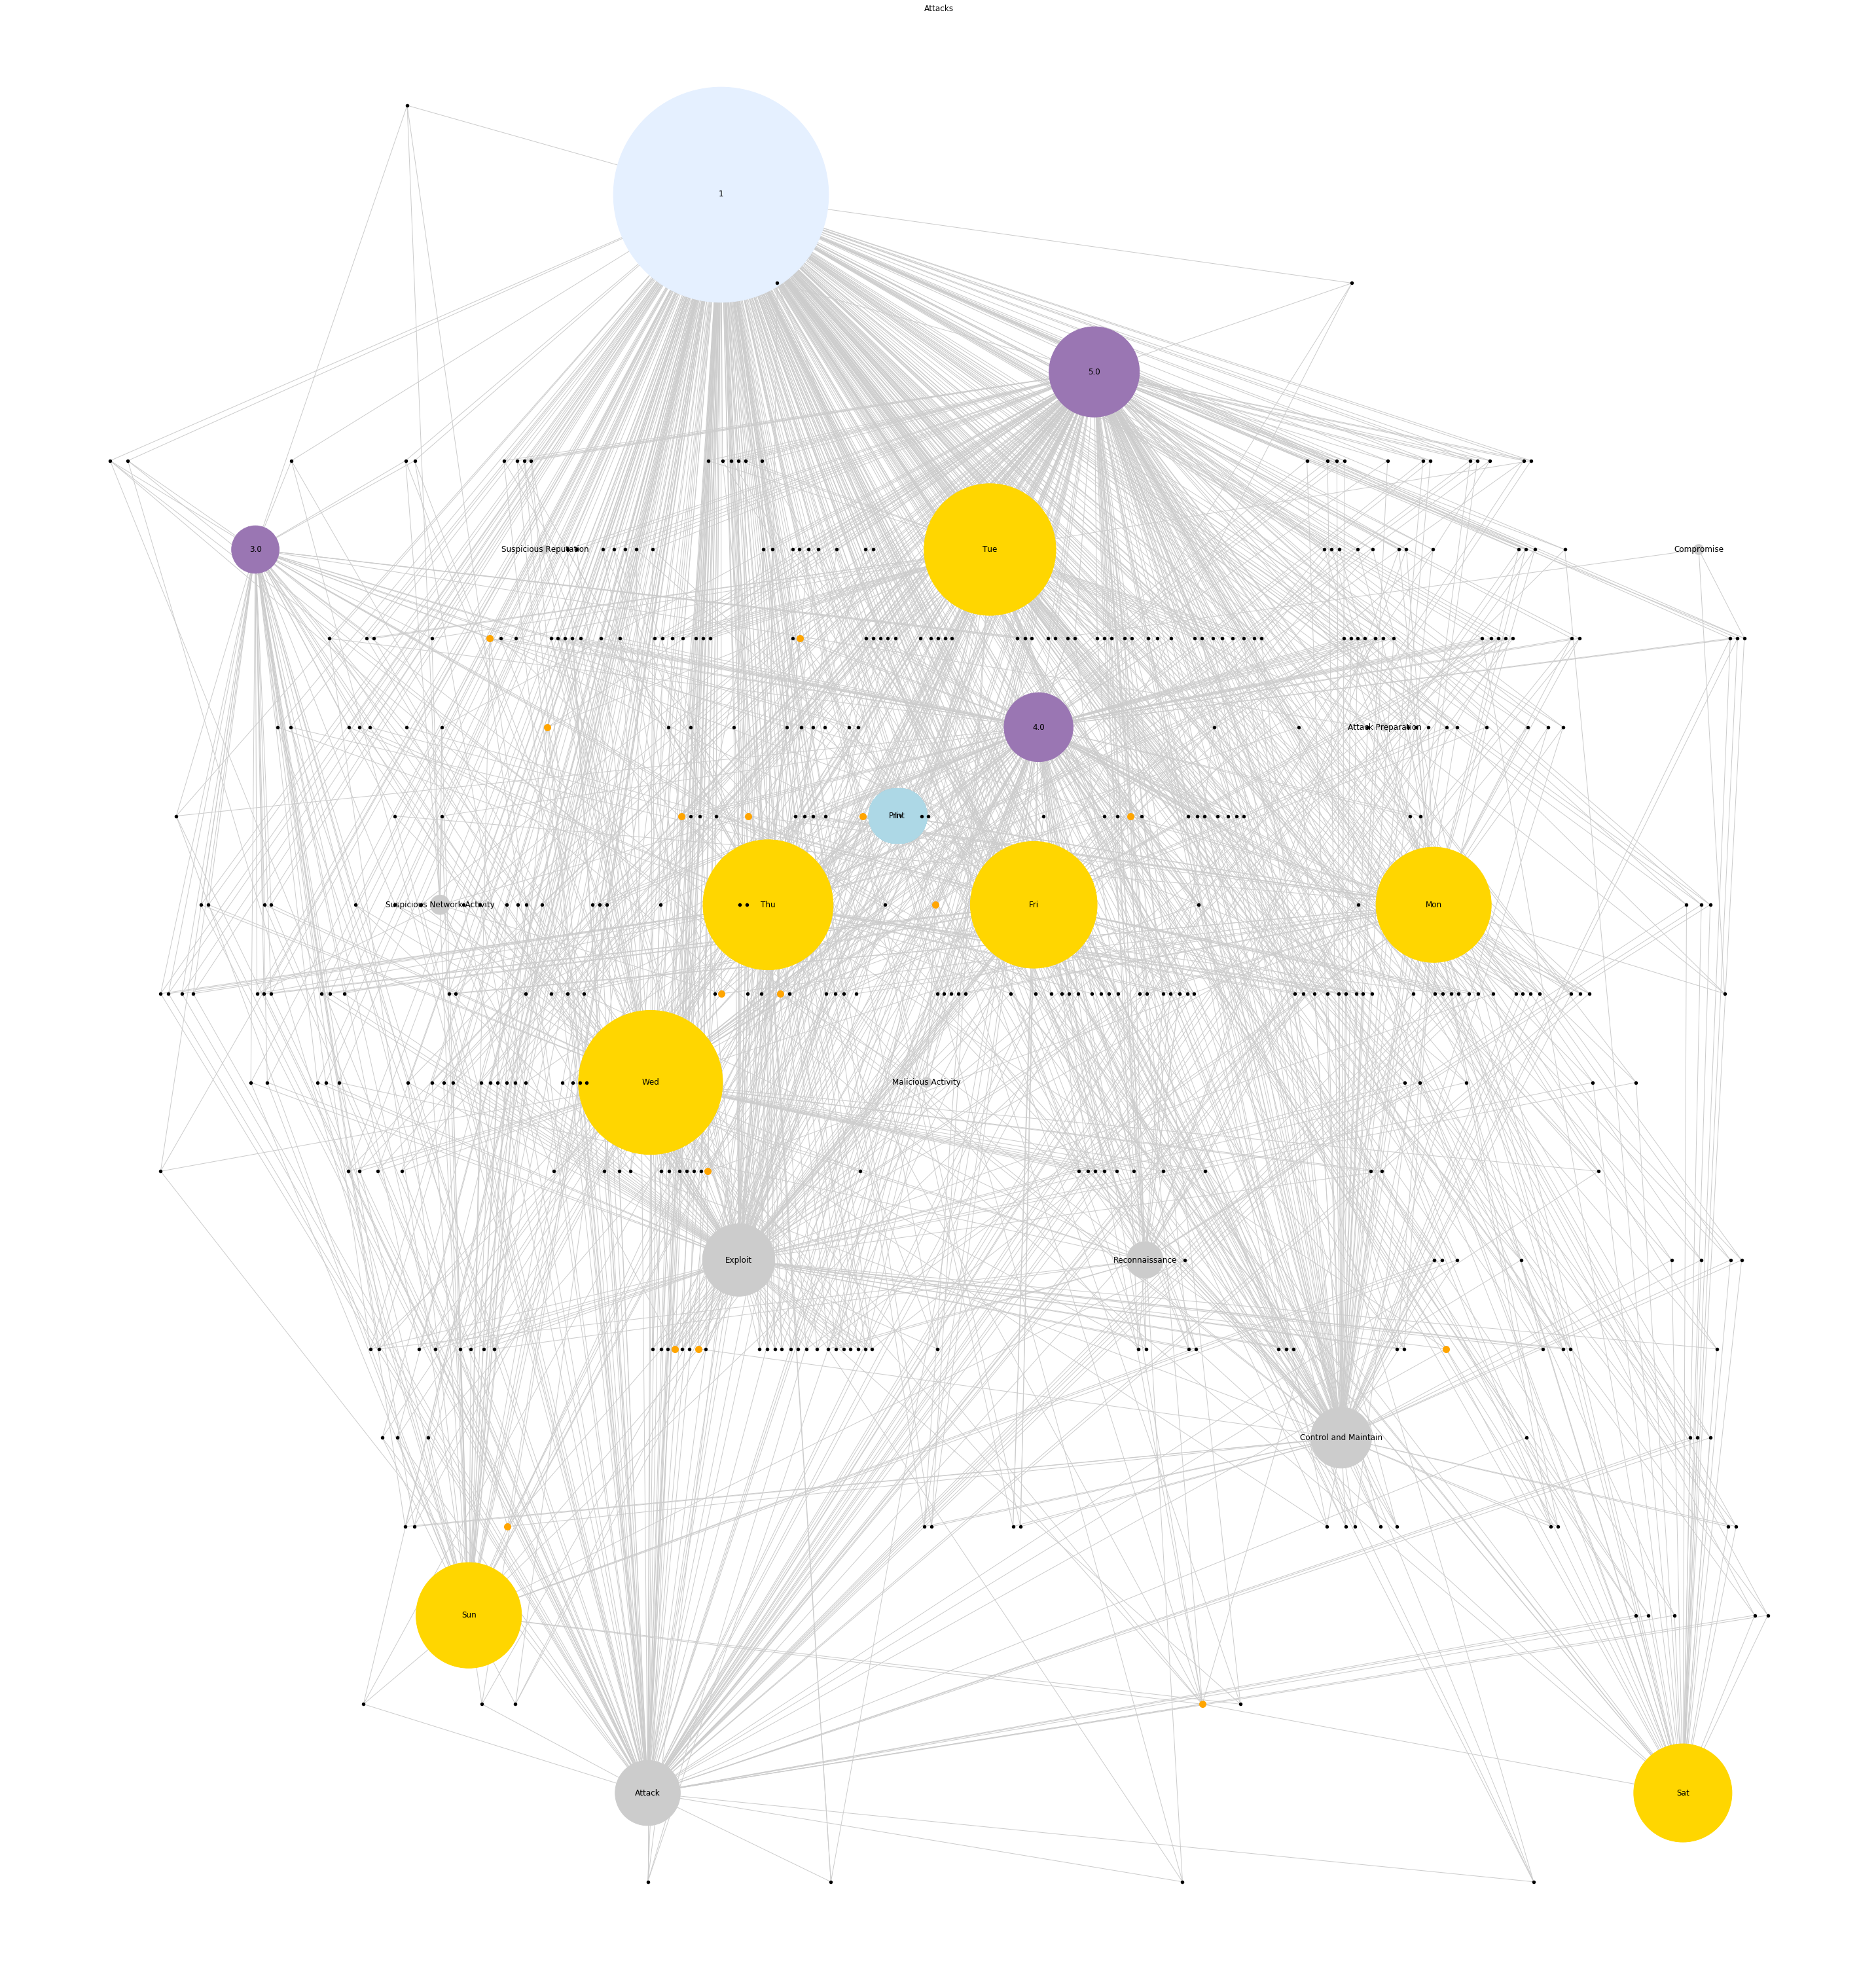

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(50, 55))

F= nx.compose(g,g1)
G= nx.compose(F,g3)
H=nx.compose(G,g2)
J=nx.compose(H,g4)
layout = nx.nx_agraph.pygraphviz_layout(J, prog='dot')



sever_size = [J.degree(sever) * 80 for sever in overallseverity]
nx.draw_networkx_nodes(J,layout, nodelist=overallseverity,node_size=sever_size, node_color='#9A76B3')

ip_cat_size = [J.degree(cat) * 80 for cat in ip_cat_name]
nx.draw_networkx_nodes(J, layout, with_labels=True, nodelist=ip_cat_name, node_color='#cccccc', node_size=ip_cat_size)

ipscope_size = [J.degree(ipscope) * 1000 for ipscope in ipcategory_scope]
nx.draw_networkx_nodes(J, layout, nodelist=ipcategory_scope, node_size=ipscope_size, node_color='lightblue')

week_size = [J.degree(weekday) * 500 for weekday in weekdays]
nx.draw_networkx_nodes(J,layout, with_labels=True, nodelist=weekdays, node_size=week_size, # a LIST of sizes, based on g.degree
                       node_color='#FFD600')

notify_size = [J.degree(notify) * 250 for notify in notify_cat]
nx.draw_networkx_nodes(J, layout, with_labels=True, nodelist=notify_cat, node_size=notify_size, node_color='#E5F0FF')
# # Draw EVERYONE

nx.draw_networkx_nodes(J, layout, nodelist=ips, node_color='black', node_size=20)

# Draw POPULAR IPS
popular_ips = [ip for ip in ips if J.degree(ip)>5]

nx.draw_networkx_nodes(J, layout, nodelist=popular_ips, node_color='orange', node_size=100)
nx.draw_networkx_edges(J, layout,nodelist=ips, edge_color="#cccccc")

print('# of edges: {}'.format(J.number_of_edges()))
print('# of nodes: {}'.format(J.number_of_nodes()))
node_labels = dict(zip(ipcategory_scope,ipcategory_scope))
nx.draw_networkx_labels(J, layout, labels=node_labels)


node_labels_week= dict(zip(weekdays, weekdays))
nx.draw_networkx_labels(J, layout, labels=node_labels_week,)
# # 4. Turn off the axis because I know you don't want it
node_labels_sever= dict(zip(overallseverity,overallseverity))
nx.draw_networkx_labels(J, layout, labels=node_labels_sever)

node_labels_notify= dict(zip(notify_cat,notify_cat))
nx.draw_networkx_labels(J, layout, labels=node_labels_notify)


node_labels_cat= dict(zip(ip_cat_name,ip_cat_name))
nx.draw_networkx_labels(J, layout, labels=node_labels_cat)

plt.axis('off')
plt.title("Attacks")
# print("radius: %d" % nx.radius(G))
# print("diameter: %d" % nx.diameter(G))
# print("eccentricity: %s" % nx.eccentricity(G))
# print("center: %s" % nx.center(G))
# print("periphery: %s" % nx.periphery(G))
# print("density: %s" % nx.density(G))
# 5. Tell matplotlib to show it
plt.show()


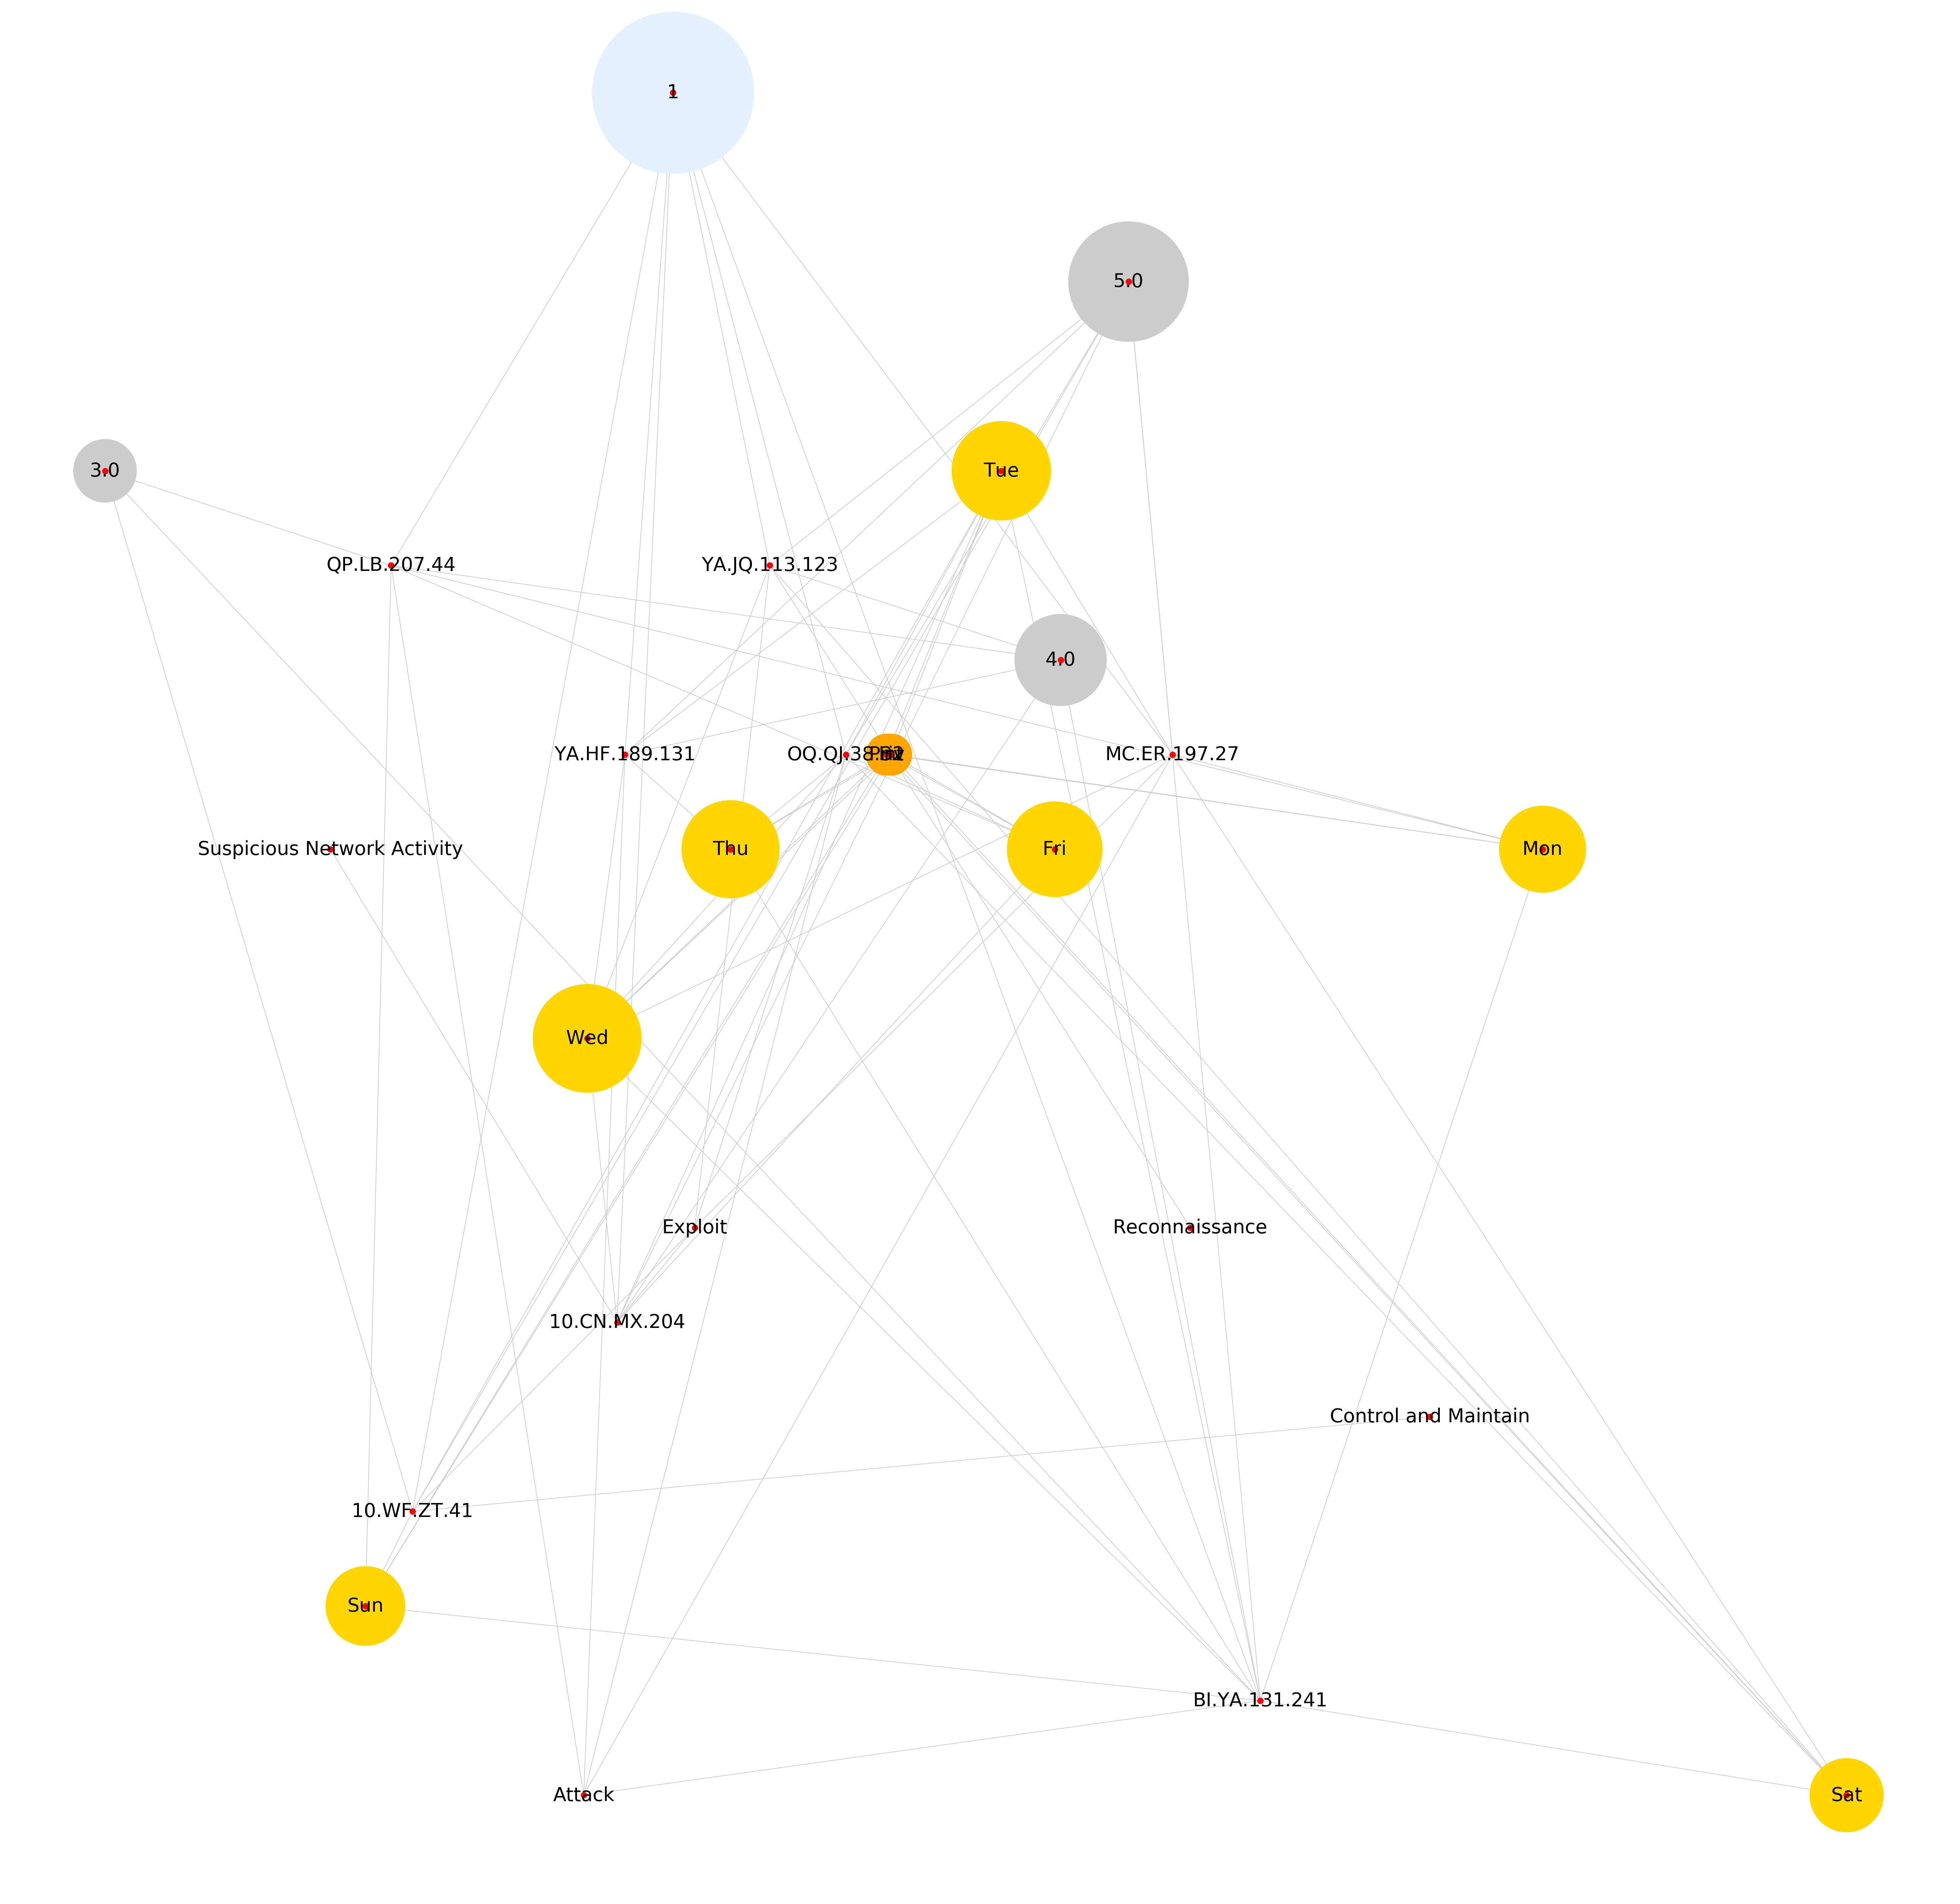

# of edges: 78
# of nodes: 26


In [10]:
plt.figure(figsize=(100, 100))
f =nx.Graph()  
layout = nx.nx_agraph.pygraphviz_layout(J, prog='dot')

notify_size = [J.degree(notify) * 500 for notify in notify_cat]
nx.draw_networkx_nodes(f, layout, nodelist=notify_cat, node_size=notify_size, node_color='#E5F0FF')

sever_size = [J.degree(sever) * 500 for sever in overallseverity]
nx.draw_networkx_nodes(f,layout, nodelist=overallseverity,node_size=sever_size, node_color='#cccccc')

ipscope_size = [J.degree(ipscope) * 2000 for ipscope in ipcategory_scope]
nx.draw_networkx_nodes(f, layout, nodelist=ipcategory_scope, node_size=ipscope_size, node_color='orange')

week_size = [J.degree(weekday) * 1000 for weekday in weekdays]
nx.draw_networkx_nodes(f,
                       layout, 
                       nodelist=weekdays, 
                       node_size=week_size, # a LIST of sizes, based on g.degree
                       node_color='#FFD600')

# ip_cat_size = [J.degree(cat) * 500 for cat in ip_cat_name ]
# nx.draw_networkx_nodes(f, layout, nodelist=ip_cat_name, node_size=ip_cat_size, node_color='#E5999F')

fedges = filter(lambda x: J.degree()[x[0]] >6 and J.degree()[x[1]] >6, J.edges())

f.add_edges_from(fedges)

nx.draw(f,layout,edge_color="#cccccc",width=2,font_size=55,with_labels=True)

plt.axis('off')
plt.savefig("Graph2.png", format="PNG")
plt.show()
print('# of edges: {}'.format(f.number_of_edges()))
print('# of nodes: {}'.format(f.number_of_nodes()))

In [11]:
from networkx.algorithms import community
import itertools
k = 7 #number of communities
comp = community.girvan_newman(f)
limited = itertools.takewhile(lambda c: len(c) <= k, comp)
for communities in limited:
    print(tuple(sorted(c) for c in communities))

([1, 3.0, 4.0, 5.0, '10.CN.MX.204', '10.WF.ZT.41', 'Attack', 'BI.YA.131.241', 'Exploit', 'Fri', 'Int', 'MC.ER.197.27', 'Mon', 'OQ.QJ.38.32', 'Priv', 'QP.LB.207.44', 'Reconnaissance', 'Sat', 'Sun', 'Suspicious Network Activity', 'Thu', 'Tue', 'Wed', 'YA.HF.189.131', 'YA.JQ.113.123'], ['Control and Maintain'])
([1, 3.0, 4.0, 5.0, '10.CN.MX.204', '10.WF.ZT.41', 'Attack', 'BI.YA.131.241', 'Exploit', 'Fri', 'Int', 'MC.ER.197.27', 'Mon', 'OQ.QJ.38.32', 'Priv', 'QP.LB.207.44', 'Reconnaissance', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed', 'YA.HF.189.131', 'YA.JQ.113.123'], ['Suspicious Network Activity'], ['Control and Maintain'])
([1, 3.0, 4.0, 5.0, '10.CN.MX.204', '10.WF.ZT.41', 'Attack', 'BI.YA.131.241', 'Exploit', 'Fri', 'Int', 'MC.ER.197.27', 'Mon', 'OQ.QJ.38.32', 'Priv', 'QP.LB.207.44', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed', 'YA.HF.189.131', 'YA.JQ.113.123'], ['Suspicious Network Activity'], ['Reconnaissance'], ['Control and Maintain'])
([1, 4.0, 5.0, '10.CN.MX.204', '10.WF.ZT.41', 'Attack', 'BI.YA.1

In [12]:
# Finding the Maximal Cliques associated with teh graph
a=nx.find_cliques(f)
i=0

# For each clique, print the members and also print the total number of communities
for clique in a:
    print (clique)
    i+=1
total_comm_max_cl=i
print('Total number of communities: ',total_comm_max_cl)

# Remove "len(clique)>1" if you're interested in maxcliques with 2 or more edges
cliques=[clique for clique in nx.find_cliques(G)]


['OQ.QJ.38.32', 1]
['OQ.QJ.38.32', 5.0]
['OQ.QJ.38.32', 'Wed']
['OQ.QJ.38.32', 'Thu']
['OQ.QJ.38.32', 'Attack']
['OQ.QJ.38.32', 'Tue']
['OQ.QJ.38.32', 'Exploit']
['OQ.QJ.38.32', 'Fri']
['OQ.QJ.38.32', 'Sat']
['Control and Maintain', '10.WF.ZT.41']
['Int', 'Wed']
['Int', 'Sun']
['Int', 'Thu']
['Int', 'Tue']
['Int', 'Mon']
['Int', 'Fri']
['Int', 'Sat']
['10.WF.ZT.41', 1]
['10.WF.ZT.41', 3.0]
['10.WF.ZT.41', 5.0]
['10.WF.ZT.41', 'Sun']
['10.WF.ZT.41', 'Exploit']
['10.WF.ZT.41', 'Tue']
['Fri', 'QP.LB.207.44']
['Fri', '10.CN.MX.204']
['Fri', 'Priv']
['QP.LB.207.44', 1]
['QP.LB.207.44', 3.0]
['QP.LB.207.44', 4.0]
['QP.LB.207.44', 'Sun']
['QP.LB.207.44', 'Attack']
['QP.LB.207.44', 'Mon']
['Exploit', 'MC.ER.197.27']
['Exploit', '10.CN.MX.204']
['Exploit', 'YA.JQ.113.123']
['YA.HF.189.131', 1]
['YA.HF.189.131', 4.0]
['YA.HF.189.131', 5.0]
['YA.HF.189.131', 'Wed']
['YA.HF.189.131', 'Thu']
['YA.HF.189.131', 'Attack']
['YA.HF.189.131', 'Tue']
['BI.YA.131.241', 1]
['BI.YA.131.241', 3.0]
['BI.YA.131